
### Customer Segmentation using K-Means Clustering

This project focuses on segmenting customers from the dataset found on Kaggle:

[Customer Segmentation Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

The dataset consists of 200 customer entries, including Customer ID, Gender, Age, Annual Income (in thousands of dollars), and a Spending Score, which reflects the customer’s purchasing behavior. A high Spending Score indicates a higher likelihood of purchasing.

In this project, we apply the K-Means clustering algorithm to segment the customers. The project is divided into several tasks:

---

### Task 1: Data Preparation and Visualization
- Import the necessary libraries.
- Load the dataset.

### Task 2: Determine Optimal Number of Clusters
- Use the Elbow Method to plot inertia values for different cluster counts.
- Identify the elbow point that suggests the optimal number of clusters.
- Calculate the silhouette coefficient for cluster validation.

### Task 3: Apply K-Means with Optimal Cluster Count
- Run the K-Means algorithm with the optimal number of clusters identified in Task 2.
- Visualize the clusters using different colors in a scatter plot.

### Task 4: Extend Clustering to Three Features
- Add "Age" as the third feature and perform 3D clustering.
- Visualize the clusters in a 3D plot with color separation for different clusters.

---

This project demonstrates customer segmentation using both 2D and 3D features to gain insights into customer behavior based on their income, spending habits, and age.

In [1]:
#load data
import pandas as pd
df = pd.read_csv('Mall_Customers.csv') 

#first data evaluation
print(df.shape)
print(df.sample(5))
print(df.describe(include = 'all'))
df.info()
#print (df.head)

(200, 5)
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
174         175  Female   52                  88                      13
32           33    Male   53                  33                       4
99          100    Male   20                  61                      49
179         180    Male   35                  93                      90
168         169  Female   36                  87                      27
        CustomerID  Gender         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   
25%      50.750000     NaN   28.750000           41.50000

elbow at x = 5


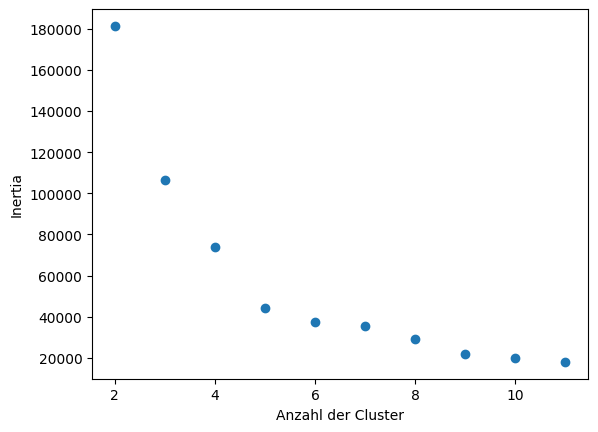

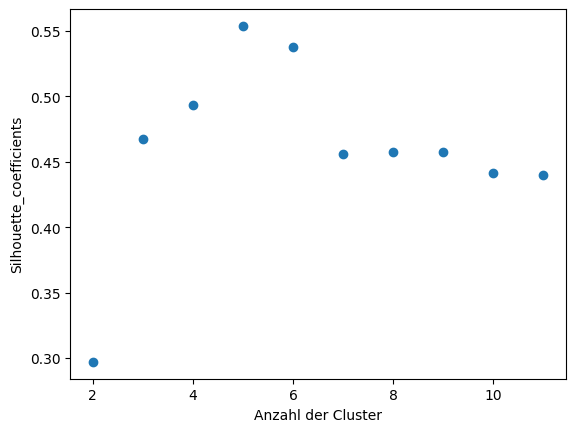

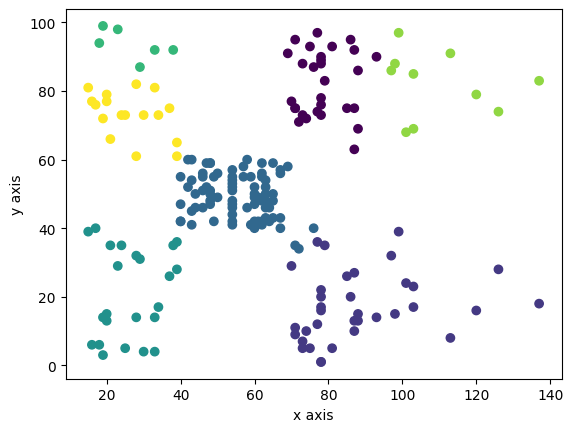

In [8]:
#for-loop for K-Means for multiple n_clusters, their plots and the documentation of inertia
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

pts = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []

cluster=[2,12] #silhouette_score if clusters > 1
silhouette_coefficients = []

for i in range(cluster[0],cluster[1]):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pts)
    inertia.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(pts, kmeans.labels_))    

#KneeLocator to calculate elbow
knee = KneeLocator(range(cluster[0],cluster[1]), inertia, curve='convex', direction = 'decreasing')
print('elbow at x =', knee.elbow)

#plot inertia
clusters = [i for i in range(cluster[0],cluster[1])]

# Scatter-Plot 
plt.scatter(clusters, inertia)
plt.xlabel('n Cluster')  
plt.ylabel('Inertia')             
plt.show()

# Scatter-Plot 
plt.scatter(clusters, silhouette_coefficients)
plt.xlabel('n Cluster')  
plt.ylabel('Silhouette Coefficients')             
plt.show()


for i in [5]:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pts)
    inertia.append(kmeans.inertia_)
    plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],c = kmeans.labels_)

    # Achsen beschriften
    plt.xlabel('Annual Income (k$)') 
    plt.ylabel('Spending Score (1-100)') 
    plt.show()

elbow at x = 5


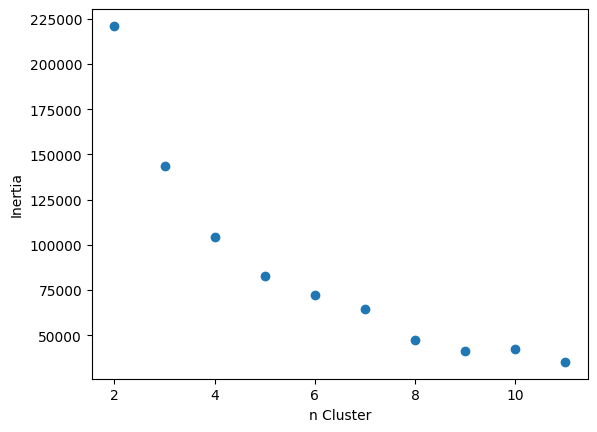

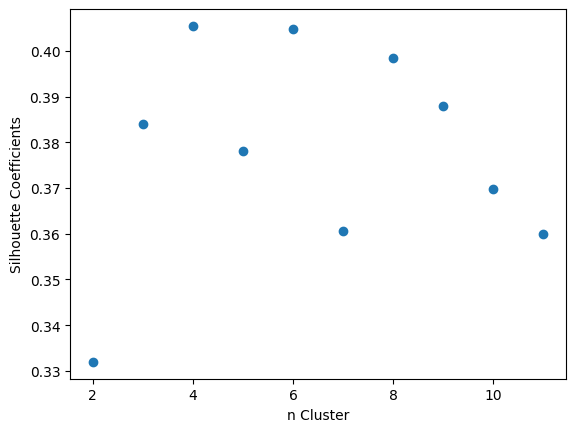

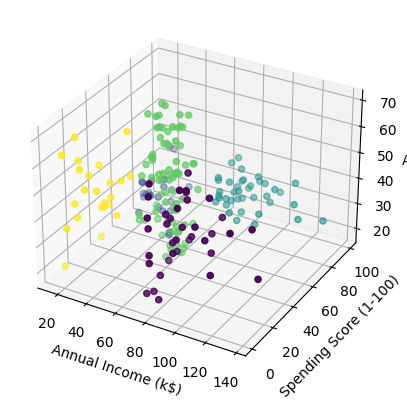

In [11]:
#for-loop for K-Means for multiple n_clusters, their plots and the documentation of inertia
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pts = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
inertia = []

cluster=[2,12]
silhouette_coefficients = []

for i in range(cluster[0],cluster[1]):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pts)
    inertia.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(pts, kmeans.labels_))
    
#KneeLocator to calculate elbow
knee = KneeLocator(range(cluster[0],cluster[1]), inertia, curve='convex', direction = 'decreasing')
print('elbow at x =', knee.elbow)

#plot inertia
clusters = [i for i in range(cluster[0],cluster[1])]

# Scatter-Plot 
plt.scatter(clusters, inertia)
plt.xlabel('n Cluster')  
plt.ylabel('Inertia')             
plt.show()

# Scatter-Plot 
plt.scatter(clusters, silhouette_coefficients)
plt.xlabel('n Cluster')  
plt.ylabel('Silhouette Coefficients')             
plt.show()


i = 5
kmeans = KMeans(n_clusters = i)
kmeans.fit(pts)
inertia.append(kmeans.inertia_)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['Annual Income (k$)'],df[ 'Spending Score (1-100)'],df[ 'Age'], c = kmeans.labels_)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')

plt.show()

